# SMS Spam Classifier

## Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset 

In [2]:
data = pd.read_csv("/home/sunny/Documents/Datasets/spam.csv",encoding=('ISO-8859-1'))

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# shape of the dataframe
data.shape

(5572, 5)

## Step 1 : DATA CLEANING

<AxesSubplot:>

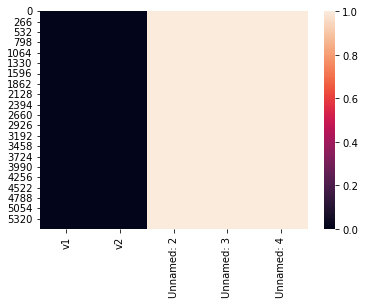

In [5]:
# checking the null values
sns.heatmap(data.isnull())

###### last 3 columns hardely have any values in it.
###### so lets drop the last three columns.

In [6]:
data.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.sample(5)

,v1,v2
4710,ham,Huh so slow i tot u reach long ago liao... U 2...
4916,spam,This is the 2nd time we have tried 2 contact u...
424,ham,Send this to ur friends and receive something ...
5231,ham,I realise you are a busy guy and i'm trying no...
45,ham,No calls..messages..missed calls


In [9]:
# renaming the columns
data.rename(columns={'v1':'target','v2':'text'},inplace = True)

In [10]:
data.sample(5)

,target,text
5263,ham,Pls speak with me. I wont ask anything other t...
1737,ham,I cant pick the phone right now. Pls send a me...
3727,ham,The search 4 happiness is 1 of d main sources ...
1240,ham,Oh yes I can speak txt 2 u no! Hmm. Did u get ...
2075,ham,Must come later.. I normally bathe him in da a...


In [11]:
# check for the duplicates
data.duplicated().sum()

403

In [12]:
# lets remove the duplicates from the dataframe
data = data.drop_duplicates(keep = 'first')

In [13]:
data.duplicated().sum()

0

In [14]:
# applying label encoder in target column
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
data['target'] = encoder.fit_transform(data['target'])

In [17]:
data.sample(5)

,target,text
2376,0,I'm on my way home. Went to change batt 4 my w...
2723,0,"Tunde, how are you doing. This is just wishing..."
4356,0,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L..."
1202,0,"Me also da, i feel yesterday night wait til 2..."
1349,1,FREE2DAY sexy St George's Day pic of Jordan!Tx...


##  Step 2 : Exploratory Data Analysis (EDA)

### Lets check the category percentage in the target column


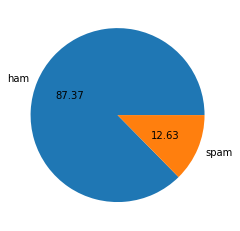

In [18]:
plt.pie(data['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

### Observation:
#### data is imbalanced

### lets checks the counts of character , words and sentences in our dataset

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sunny/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sunny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# 1st column
data['num_character'] = data['text'].apply(len)

In [23]:
data.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# 2nd column
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# 3rd column 
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# lets check the discription 
data[['num_character' , 'num_words' , 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# lets check the discription on basis of target category
data[data['target'] == 0][['num_character' , 'num_words' , 'num_sentences']].describe()  # ham messages

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
data[data['target'] == 1][['num_character' , 'num_words' , 'num_sentences']].describe()  # spam messages

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Observation:
#### we can see that the spam messages are usually long .

<AxesSubplot:xlabel='num_character', ylabel='Count'>

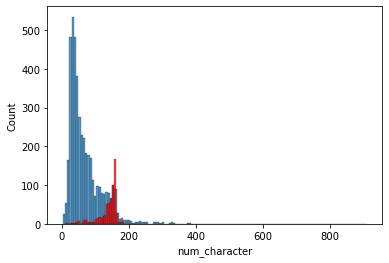

In [31]:
# lets visulaize
sns.histplot(data[data['target'] == 0]['num_character']) 
sns.histplot(data[data['target'] == 1]['num_character'],color = 'red') 

<AxesSubplot:xlabel='num_words', ylabel='Count'>

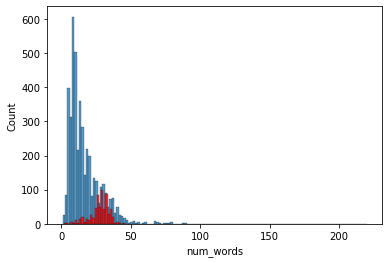

In [32]:
sns.histplot(data[data['target'] == 0]['num_words']) 
sns.histplot(data[data['target'] == 1]['num_words'],color = 'red') 

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

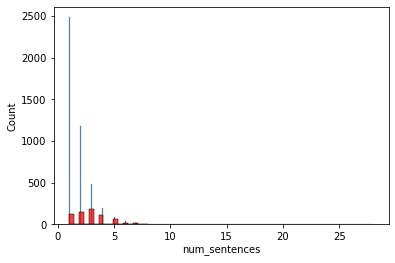

In [33]:
sns.histplot(data[data['target'] == 0]['num_sentences']) 
sns.histplot(data[data['target'] == 1]['num_sentences'],color = 'red') 

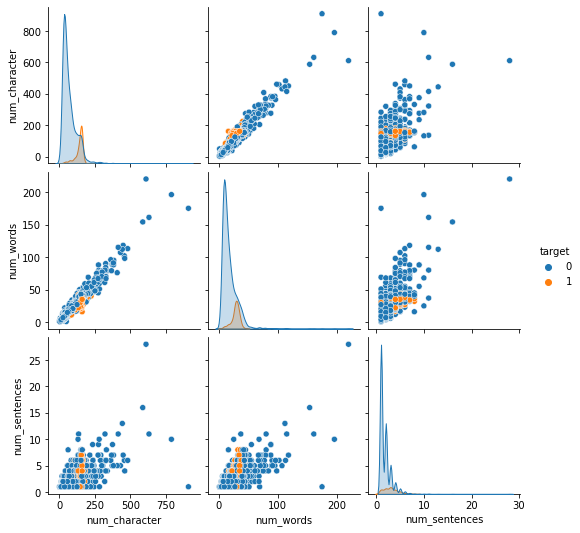

In [34]:
# lets check the relation between the columns
sns.pairplot(data,hue = 'target')

<AxesSubplot:>

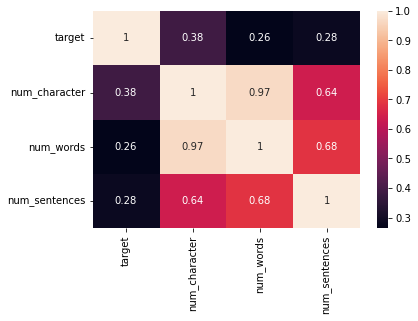

In [35]:
# lets see the correlaton 
sns.heatmap(data.corr(), annot = True)

### Observation:
#### num_characters,num_words,num_sentences have high correlation.
#### i will simply keep only one column .

##  Step 3 : DATA PREPROCESSING

## I will perform the following steps:
### 1--> Lower case
### 2--> Tokenization
### 3--> Removing special characters
### 4--> Removing stop words and punctuation
### 5--> Stemming

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [37]:
ps = PorterStemmer()

In [73]:
# function that will perform all of this task at once
def transform_text(text):
    text = text.lower()                   # lowercase the text
    text = nltk.word_tokenize(text)        # text broken into words
    
    y = []
    for i in text:
        if i.isalnum():                   # removing all the special characters
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:     # removing stopwords and punctuation
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))     # applying steeming
        
    return " ".join(y)

In [39]:
data['transformed_text'] = data['text'].apply(transform_text)

In [40]:
data.sample(5)

,target,text,num_character,num_words,num_sentences,transformed_text
4107,0,Pls send me your address sir.,29,7,1,pl send address sir
147,0,Ummma.will call after check in.our life will b...,84,16,1,call check life begin qatar pl pray hard
676,0,Maybe?! Say hi to and find out if got his ca...,80,19,3,mayb say hi find got card great escap wetherspoon
3791,0,Love it! I want to flood that pretty pussy wit...,54,13,2,love want flood pretti pussi cum
5562,0,Ok lor... Sony ericsson salesman... I ask shuh...,96,21,2,ok lor soni ericsson salesman ask shuhui say q...


### Lets check the important words used in both spam and ham messages with the help of word cloud

In [41]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width = 900 , height = 900 , min_font_size = 30 , background_color = 'white')

In [43]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = " "))

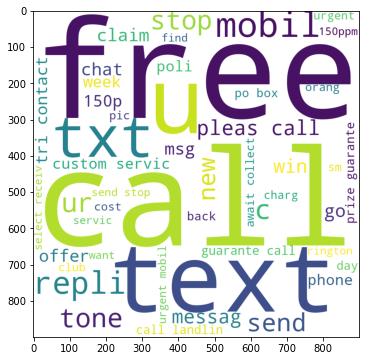

In [44]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep = " "))

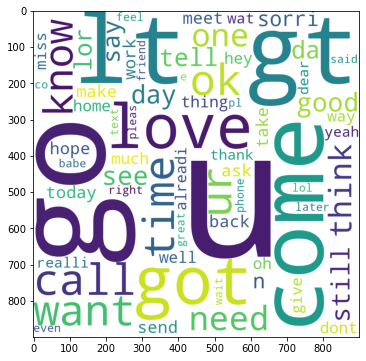

In [46]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

##  Step 4 : Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer()

In [49]:
x = cv.fit_transform(data['transformed_text']).toarray()

In [50]:
x.shape

(5169, 6708)

In [51]:
y = data['target'].values

In [52]:
y.shape

(5169,)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [55]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train , y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test , ypred1))
print(confusion_matrix(y_test , ypred1))
print(precision_score(y_test , ypred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [58]:
mnb.fit(X_train , y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test , ypred2))
print(confusion_matrix(y_test , ypred2))
print(precision_score(y_test , ypred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [59]:
bnb.fit(X_train , y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test , ypred3))
print(confusion_matrix(y_test , ypred3))
print(precision_score(y_test , ypred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## Step5 : Improving the performance

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf = TfidfVectorizer(max_features = 3000)

In [62]:
x1 = tfidf.fit_transform(data['transformed_text']).toarray()

In [63]:
x1.shape

(5169, 3000)

In [64]:
y1 = data['target'].values

In [65]:
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.2,random_state = 2)

In [66]:
gnbb = GaussianNB()
mnbb = MultinomialNB()
bnbb = BernoulliNB()

In [67]:
gnbb.fit(X_train , y_train)
ypred01 = gnbb.predict(X_test)
print(accuracy_score(y_test , ypred01))
print(confusion_matrix(y_test , ypred01))
print(precision_score(y_test , ypred01))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [68]:
mnbb.fit(X_train , y_train)
ypred02 = mnbb.predict(X_test)
print(accuracy_score(y_test , ypred02))
print(confusion_matrix(y_test , ypred02))
print(precision_score(y_test , ypred02))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [69]:
bnbb.fit(X_train , y_train)
ypred03 = bnbb.predict(X_test)
print(accuracy_score(y_test , ypred03))
print(confusion_matrix(y_test , ypred03))
print(precision_score(y_test , ypred03))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## MultinomialNB Alogorithm give the precision sore of 1.0 which is great as we know that data is inbalanced and in this case the accuracy does not matter more that precision score.

## Step6 : Model Saving

In [70]:
import pickle

In [72]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnbb,open('model.pkl','wb'))